## Q-learning, SARSA, EV-SARSA


Этот ноутбук проведет вас через реализацию базового алгоритма Q-learning, а также SARSA и EV-SARSA.

Сначала вам нужно реализовать QLearningAgent (следуя инструкциям для каждого метода) и применить его в ряде тестов ниже.

In [ ]:
import os

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

bash: ../xvfb: No such file or directory


In [ ]:
import math
import random
import time
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import trange

%matplotlib inline

SEED = 42

def moving_average(x, span=100):
    return pd.DataFrame({"x": np.asarray(x)}).x.ewm(span=span).mean().values

def seed_everything(env, seed=None):
    if seed is None:
        seed = SEED
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    env.reset(seed=seed)


def visualize_agent(env, agent, max_steps=100, delay=0.1, greedy=True):
    """
    Visualize the agent's behavior in the environment.

    Args:
        env: The environment
        agent: The trained agent
        max_steps: Maximum number of steps to take
        delay: Time delay between steps for visualization
    """
    s, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        # Render the environment
        clear_output(True)
        plt.figure(figsize=(8, 6))
        plt.imshow(env.render())
        plt.title(f"Step: {step}, Total Reward: {total_reward:.2f}")
        plt.axis("off")
        plt.show()

        # Get action from the agent
        a = agent.get_best_action(s) if greedy else agent.get_action(s)

        # Take a step in the environment
        next_s, r, done, _, _ = env.step(a)

        # Update state and reward
        s = next_s
        total_reward += r

        # Add delay for better visualization
        time.sleep(delay)

        if done:
            # Show final state
            clear_output(True)
            plt.figure(figsize=(8, 6))
            plt.imshow(env.render())
            plt.title(f"Final State - Steps: {step + 1}, Total Reward: {total_reward:.2f}")
            plt.axis("off")
            plt.show()
            break

## Q-Learning

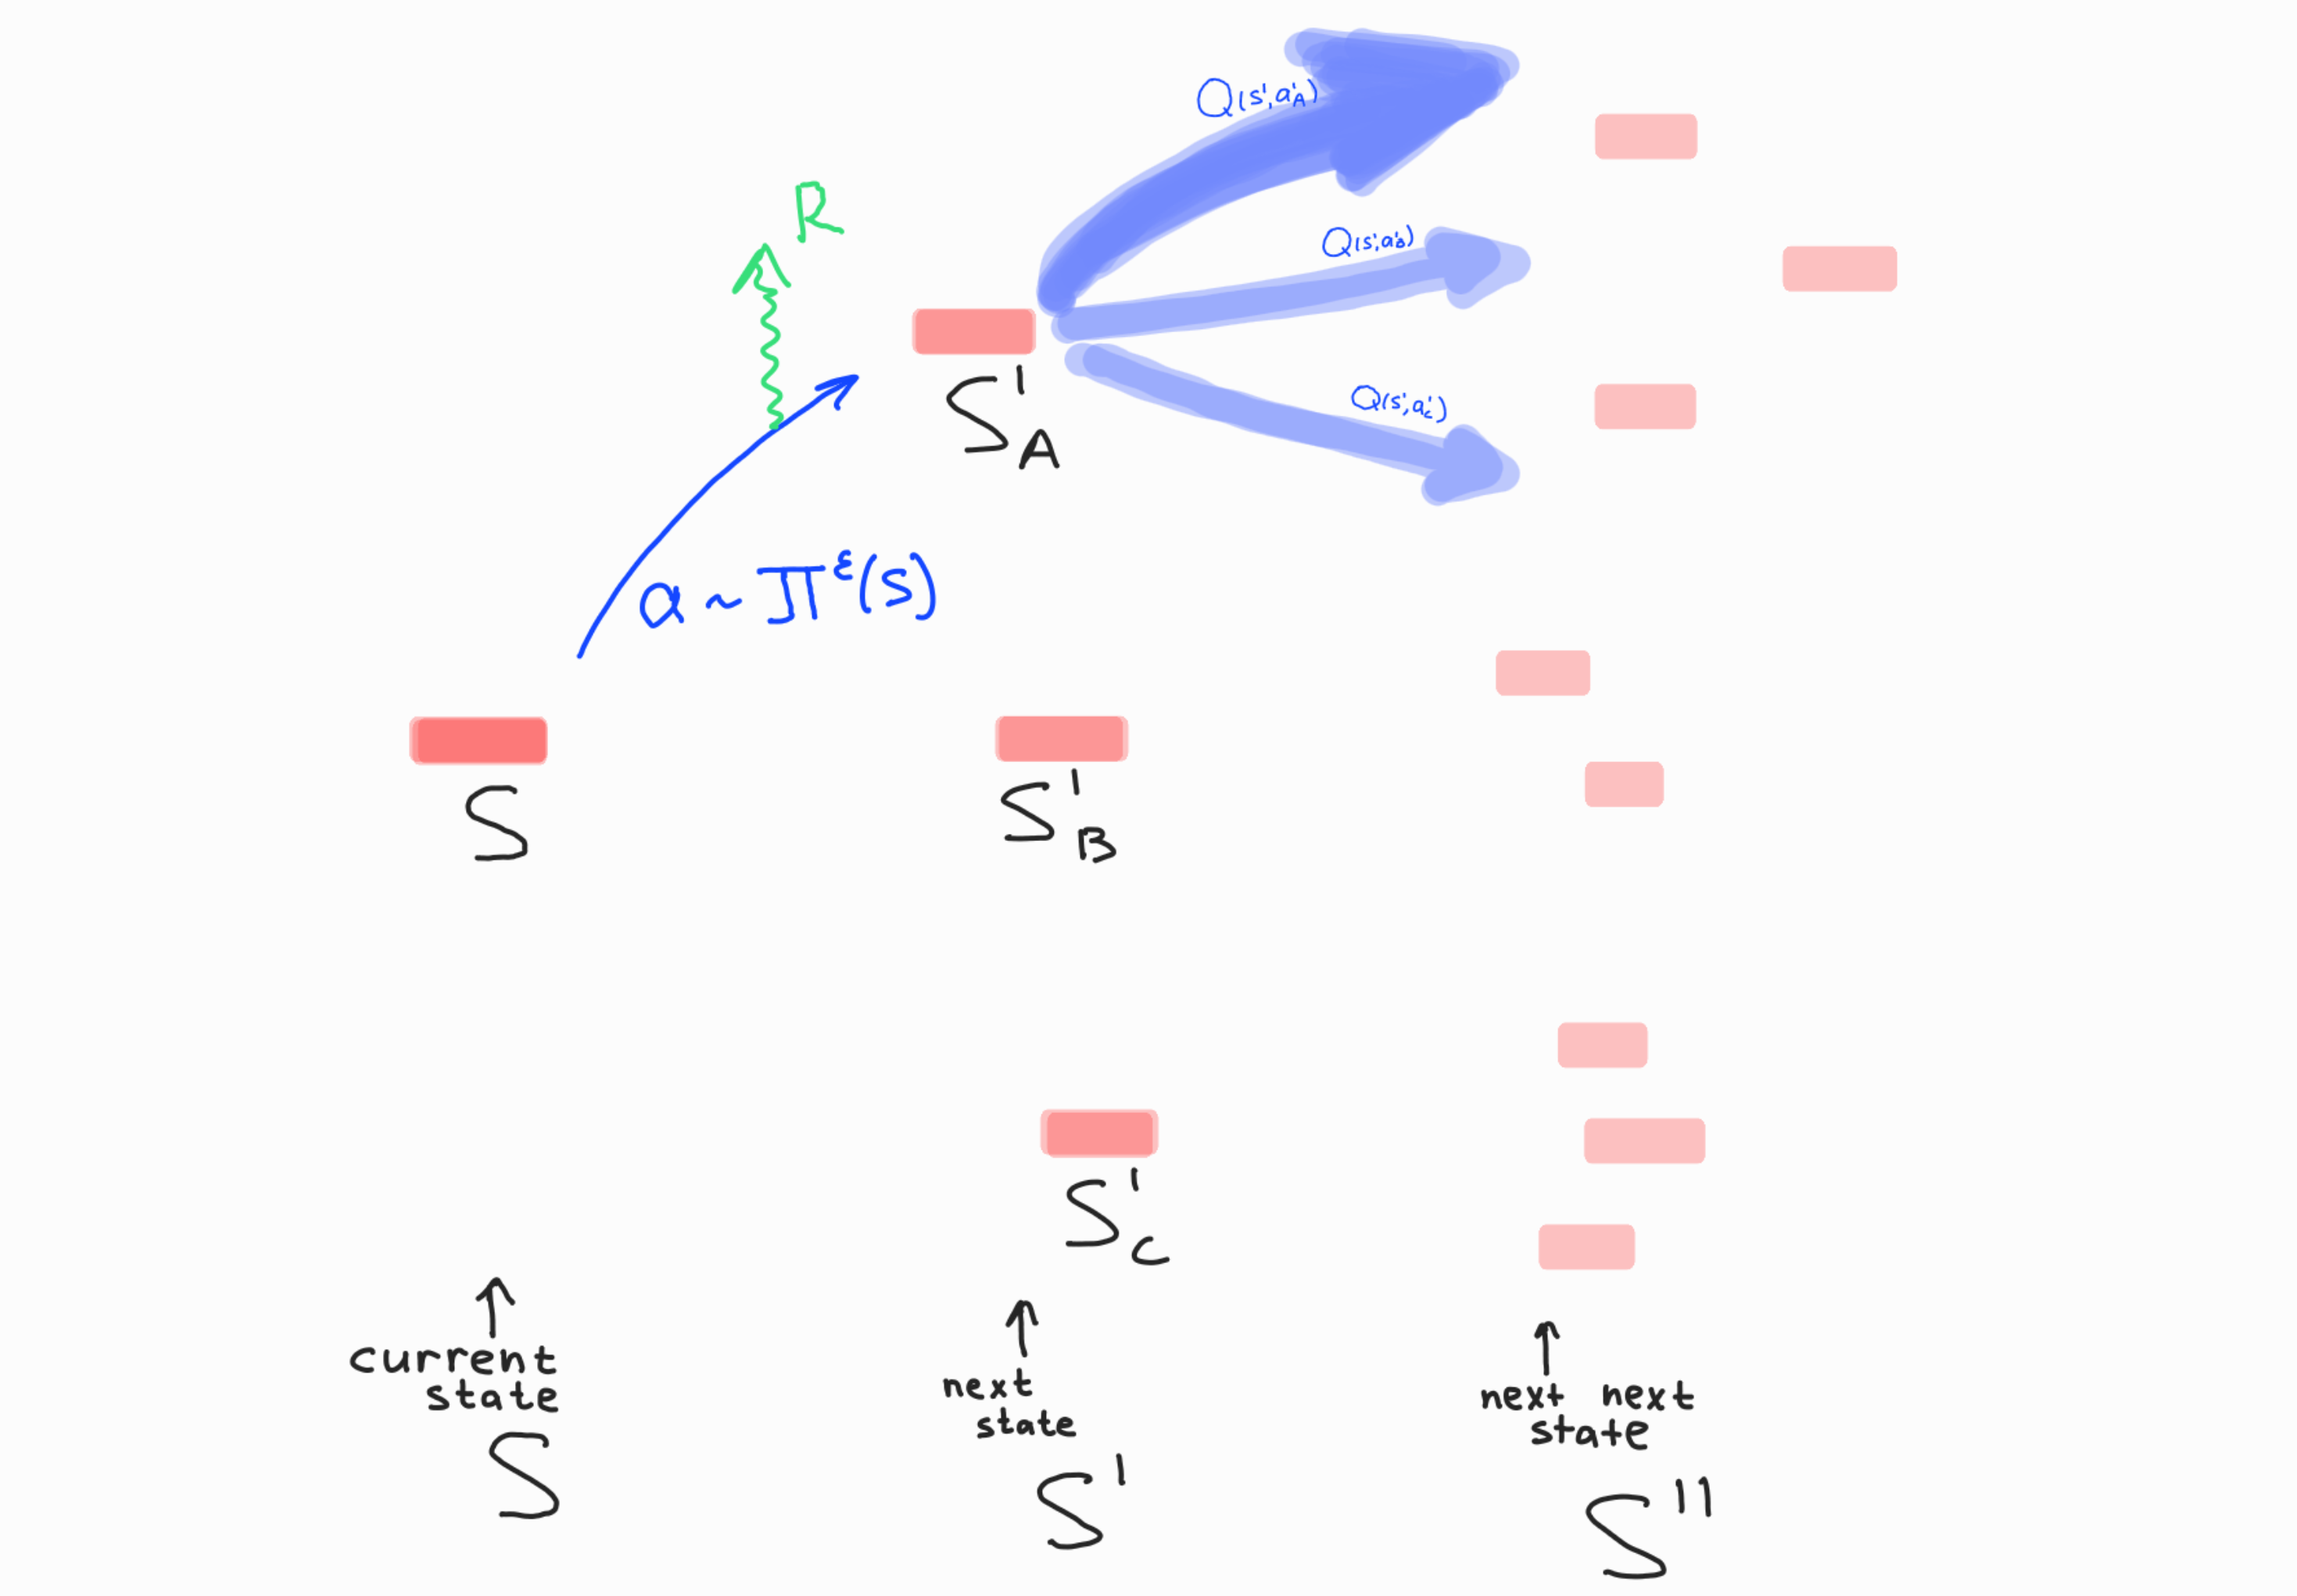

**Q-обучение** — это off-policy алгоритм на основе TD.
Он обучается функции ценности действий Q(s, a), которая оценивает ожидаемую дисконтированную награду при выполнении действия $a$ в состоянии $s$, и далее следовании жадной политике (всегда выбирая наилучшее действие).

### Правило обновления

Шаг обновления для Q-обучения:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \Big[ r + \gamma \max_{a’} Q(s’,a’) - Q(s,a) \Big]
$$

где:
- $\alpha$ — скорость обучения
- $\gamma$ — коэффициент дисконтирования
- $r$ — награда, полученная после выполнения действия a в состоянии s
- $s’$ — следующее состояние
- $\max_{a’} Q(s’,a’)$ — оценка оптимальной будущей ценности

### Основные свойства

- off-policy: агент обучается относительно жадной (оптимальной) политики, даже если во время тренировки он следует ε-жадной стратегии исследования.
- Оптимистичное обучение: Q-обучение предполагает, что в будущем всегда будет выбрано наилучшее действие.
- Исследование (exploration): на практике используется $\epsilon$-жадная стратегия, чтобы балансировать исследование и использование уже известных действий.

### Интуиция

Q-обучение стремится сходиться к оптимальной политике независимо от того, как агент действует во время тренировки (при условии, что все действия пробуются бесконечно часто).
Это делает алгоритм мощным, но в рискованных средах (например, CliffWalking) он может выбирать опасные кратчайшие пути, потому что планирует так, как будто в будущем всегда будет действовать жадно, несмотря на то что исследовательские шаги могут приводить к ошибкам.

In [ ]:
class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on https://inst.eecs.berkeley.edu/~cs188/sp19/projects.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value
        !!!Important!!!
        Note: please avoid using self._qValues directly.
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """Returns Q(state,action)"""
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        """Sets the Qvalue for [state,action] to the given value"""
        self._qvalues[state][action] = value

    # ---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        # <YOUR CODE HERE>
        value =

        # </END OF YOUR CODE>

    def update(self, state, action, reward, next_state):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        # agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        # <YOUR CODE HERE>
        new_q_value =

        # </END OF YOUR CODE>

        self.set_qvalue(state, action, q_value)

    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values).
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        # <YOUR CODE HERE>
        best_action =

        # </END OF YOUR CODE>

        return best_action

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.get_best_action).

        Note: To pick randomly from a list, use random.choice(list).
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        action = np.random.choice(possible_actions)

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        # agent parameters:
        epsilon = self.epsilon

        # <YOUR CODE HERE>
        chosen_action =

        # </END OF YOUR CODE>

        return chosen_action =

### Try it on cliffwalking!

Здесь мы используем агента Q-learning в среде CliffWalking из OpenAI Gym.
Вам потребуется реализовать несколько функций агента здесь.

In [ ]:
import gymnasium as gym

env = gym.make("CliffWalking-v1", render_mode="rgb_array")
n_actions = env.action_space.n

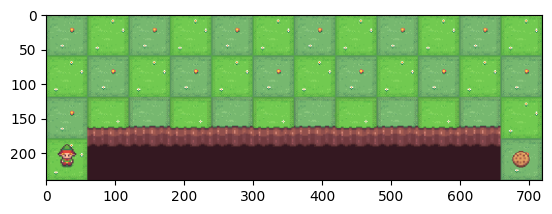

In [ ]:
env.reset()
plt.imshow(env.render())

In [ ]:
agent = QLearningAgent(
    alpha=0.5, epsilon=0.5, discount=0.99,
    get_legal_actions=lambda s: range(n_actions))

In [ ]:
def play_and_train(env, agent, t_max=10**4):
    """
    This function should
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s, _ = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s.
        # <YOUR CODE HERE>
        a =

        # </END OF YOUR CODE>

        next_s, r, terminated, truncated, _ = env.step(a)

        # train (update) agent for state s
        # <YOUR CODE HERE>
        agent.update(...)

        # </END OF YOUR CODE>

        s = next_s
        total_reward += r
        if terminated or truncated:
            break

    return total_reward

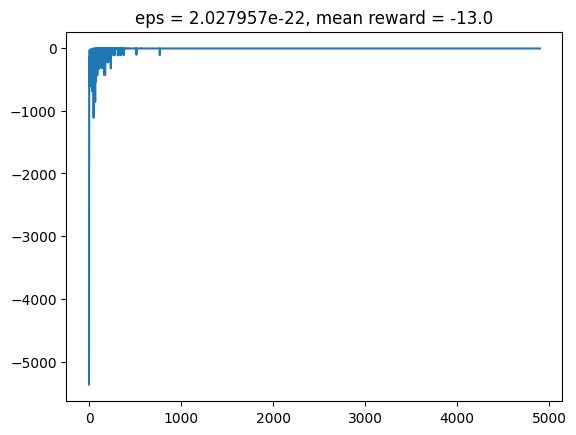

In [ ]:
from IPython.display import clear_output

rewards = []
for i in range(5000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99

    if i % 100 == 0:
        clear_output(True)
        plt.title('eps = {:e}, mean reward = {:.1f}'.format(agent.epsilon, np.mean(rewards[-10:])))
        plt.plot(rewards)
        plt.show()

In [ ]:
def get_ascii_policy(agent):
    """Returns CliffWalkingEnv optimal policy with arrows as a string. Hard-coded."""

    env = gym.make("CliffWalking-v1", render_mode="ansi")
    env.reset()
    grid = [x.split("  ") for x in env.render().split("\n")[:4]]

    n_rows, n_cols = 4, 12
    start_state_index = 36
    actions = "^>v<"

    policy_str = ""
    for yi in range(n_rows):
        for xi in range(n_cols):
            if grid[yi][xi] == "C":
                policy_str += " C "
            elif (yi * n_cols + xi) == start_state_index:
                policy_str += " X "
            elif (yi * n_cols + xi) == n_rows * n_cols - 1:
                policy_str += " T "
            else:
                policy_str += " %s " % actions[agent.get_best_action(yi * n_cols + xi)]
        policy_str += "\n"

    return policy_str


def draw_policy(agent):
    """Prints CliffWalkingEnv policy with arrows."""
    print(get_ascii_policy(agent))

In [ ]:
print("Q-Learning")
draw_policy(agent)

Q-Learning
 >  >  >  >  v  ^  >  v  >  >  v  v 
 >  >  v  >  v  v  >  >  v  v  >  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 



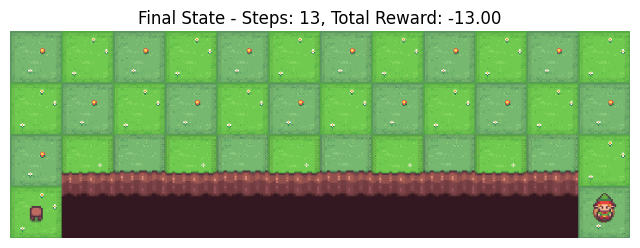

In [ ]:
visualize_agent(env, agent, greedy=True)

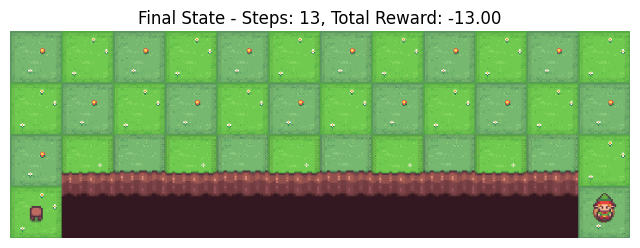

In [ ]:
visualize_agent(env, agent, greedy=False)

### Idea!

Давайте попробуем оставить жадное исследование (\epsilon > 0) во время обучения.
- Сможет ли Q-learning всё ещё научиться оптимальной политике?
- Сможет ли Q-learning научиться исследовательской политике?

## SARSA

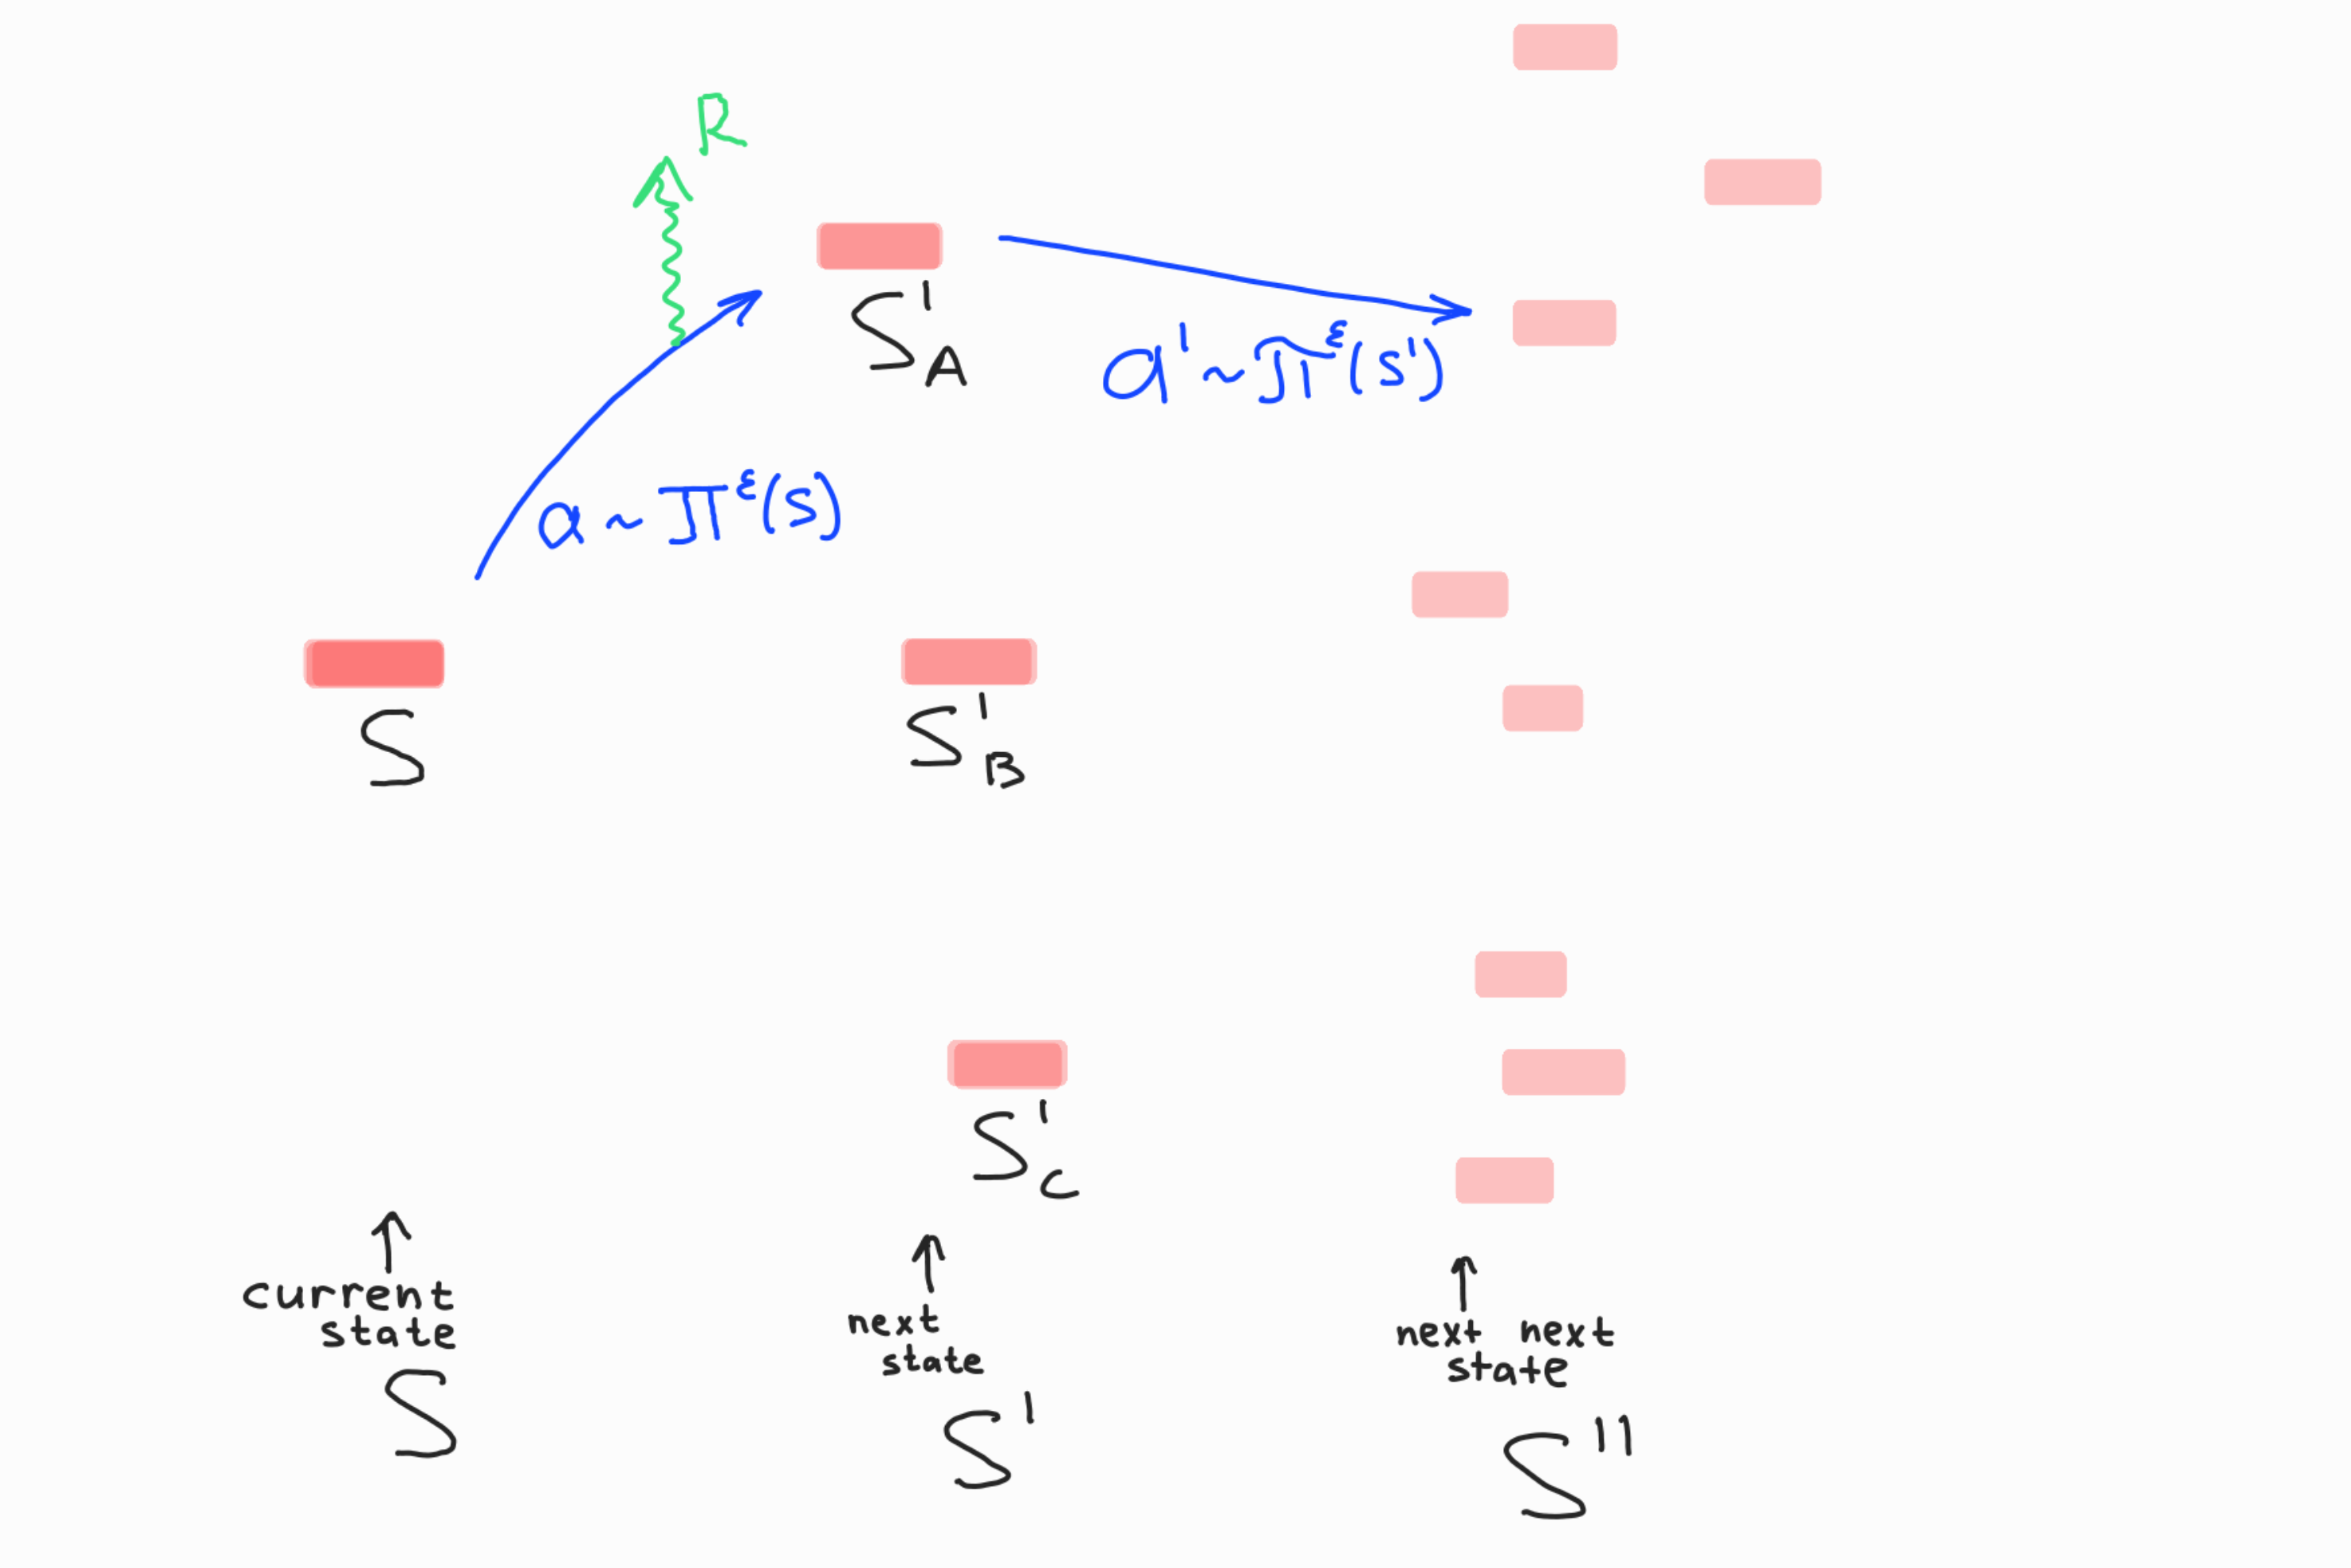

SARSA — это on-policy TD-learning.
Он обучается функции ценности действий Q(s, a), оценивая ожидаемую дисконтированную награду при выполнении действия $a$ в состоянии $s$, если агент будет следовать $\epsilon$-жадной стратегии, которую он использует во время обучения.

### Правило обновления:

Шаг обновления для SARSA:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \Big[ r + \gamma Q(s’, a’) - Q(s,a) \Big]
$$

где:
- $\alpha$ — скорость обучения
- $\gamma$ — коэффициент дисконтирования
- $r$ — награда, полученная после выполнения действия a в состоянии s
- $s’$ — следующее состояние
- $a’$ — следующее действие, выбранное согласно ε-жадной политике

### Основные свойства

- on-policy: агент обучается относительно той политики, которую он реально выполняет, включая исследовательские шаги (ε-жадность).
- Безопасность в рискованных средах: SARSA учитывает возможные случайные действия при исследовании, поэтому менее склонен к «опасным кратчайшим путям» по сравнению с Q-learning.
- Исследование: как и в Q-learning, используется $\epsilon$-жадная стратегия, чтобы сбалансировать исследование и использование знаний.

### Интуиция

SARSA обучается так, как он будет действовать на самом деле.
В средах с высокими рисками (например, CliffWalking) это позволяет агенту выбирать более безопасные маршруты, учитывая вероятность случайного шага в неправильную сторону.
Таким образом, политика SARSA обычно более консервативна по сравнению с Q-learning, но снижает риск получения отрицательных наград.

In [ ]:
class SarsaAgent(QLearningAgent):
    """
    An agent that changes some of q-learning functions to implement SARSA.
    Note: this demo assumes that your implementation of QLearningAgent.update uses get_value(next_state).
    If it doesn't, please add
        def update(self, state, action, reward, next_state):
            and implement it for SARSA's V(s')
    """

    def get_value(self, state):
        """
        Returns Vpi for current state under epsilon-greedy policy:
          V_{pi}(s) = Q(s, a_i)}, where a_i ~ pi(a_i | s)

        Hint: all other methods from QLearningAgent are still accessible.
        """
        epsilon = self.epsilon
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        # # <YOUR CODE HERE>

        state_value = ...

        # </END OF YOUR CODE>

        return state_value

## Expected Value SARSA (EV-SARSA)

EV-SARSA — это тоже on-policy TD. Однако, он использует ожидаемое значение будущих действий вместо отдельного случайного выбора.
Он обучается функции ценности действий Q(s, a), учитывая $\epsilon$-жадную политику, но использует для обновления ожидаемое значение следующего состояния:

### Правило обновления

Шаг обновления для EV-SARSA:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \Big[ r + \gamma V(s’) - Q(s,a) \Big],\qquad V(s’) = \sum_{a’} \pi(a’|s’) \, Q(s’, a’)
$$

где:

- $\alpha$ — скорость обучения
- $\gamma$ — коэффициент дисконтирования
- $r$ — награда после выполнения действия a в состоянии s
- $s’$ — следующее состояние
- $\pi(a’|s’)$ — вероятность выбора действия a’ в состоянии s’ согласно ε-жадной политике

### Основные свойства

- on-policy: агент обучается относительно $\epsilon$-жадной политики, которую он реально использует.
- Сглаживание обновлений: использование ожидаемого значения V(s’) уменьшает дисперсию обновлений по сравнению с обычной SARSA.
- Безопасность: EV-SARSA учитывает вероятность исследовательских шагов заранее, что делает политику более надежной в рискованных средах.

### Интуиция

EV-SARSA комбинирует лучшие свойства SARSA и «математическую стабильность»:
- Политика безопаснее, чем у Q-learning, потому что учитывает ε-жадные случайные шаги.
- Обновления менее шумные, чем у стандартной SARSA, потому что берется среднее по всем возможным действиям, а не по одному выбранному действию.
- В средах вроде CliffWalking это помогает избегать риска падения в пропасть, сохраняя при этом хорошую производительность.

In [ ]:
class EVSarsaAgent(QLearningAgent):
    """
    An agent that changes some of q-learning functions to implement Expected Value SARSA.
    Note: this demo assumes that your implementation of QLearningAgent.update uses get_value(next_state).
    If it doesn't, please add
        def update(self, state, action, reward, next_state):
            and implement it for Expected Value SARSA's V(s')
    """

    def get_value(self, state):
        """
        Returns Vpi for current state under epsilon-greedy policy:
          V_{pi}(s) = sum _{over a_i} {pi(a_i | s) * Q(s, a_i)}

        Hint: all other methods from QLearningAgent are still accessible.
        """
        epsilon = self.epsilon
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        # # <YOUR CODE HERE>

        state_value = ...

        # </END OF YOUR CODE>

        return state_value

EVSARSA mean reward = -33.3
SARSA mean reward = -32.15
QLEARNING mean reward = -127.82


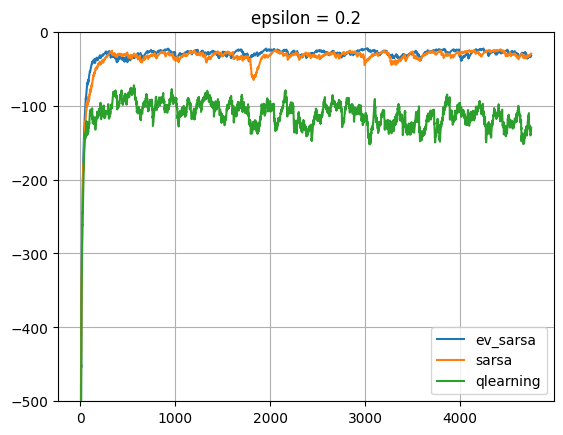

100%|██████████| 5000/5000 [00:23<00:00, 215.45it/s]


In [ ]:
from IPython.display import clear_output

seed_everything(env)

agent_evsarsa = EVSarsaAgent(alpha=0.25, epsilon=0.2, discount=0.99, get_legal_actions=lambda s: range(env.action_space.n))
agent_sarsa = SarsaAgent(alpha=0.25, epsilon=0.2, discount=0.99, get_legal_actions=lambda s: range(env.action_space.n))
agent_ql = QLearningAgent(alpha=0.25, epsilon=0.2, discount=0.99, get_legal_actions=lambda s: range(env.action_space.n))

rewards_sarsa, rewards_evsarsa, rewards_ql = [], [], []

for i in trange(5000):
    rewards_evsarsa.append(play_and_train(env, agent_evsarsa))
    rewards_sarsa.append(play_and_train(env, agent_sarsa))
    rewards_ql.append(play_and_train(env, agent_ql))
    # Note: agent.epsilon stays constant

    if i % 250 == 0:
        clear_output(True)
        print("EVSARSA mean reward =", np.mean(rewards_evsarsa[-100:]))
        print("SARSA mean reward =", np.mean(rewards_sarsa[-100:]))
        print("QLEARNING mean reward =", np.mean(rewards_ql[-100:]))
        plt.title("epsilon = %s" % agent_ql.epsilon)
        plt.plot(moving_average(rewards_evsarsa), label="ev_sarsa")
        plt.plot(moving_average(rewards_sarsa), label="sarsa")
        plt.plot(moving_average(rewards_ql), label="qlearning")
        plt.grid()
        plt.legend()
        plt.ylim(-500, 0)
        plt.show()

In [ ]:
print("Q-Learning")
draw_policy(agent_ql)

print("SARSA")
draw_policy(agent_sarsa)

print("EVSARSA")
draw_policy(agent_evsarsa)


Q-Learning
 >  v  >  >  >  >  v  v  >  v  v  v 
 v  v  v  v  v  v  v  v  v  v  v  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 

SARSA
 >  >  >  >  >  >  >  >  >  >  >  v 
 ^  ^  ^  ^  >  ^  >  >  ^  ^  >  v 
 ^  ^  <  ^  ^  >  ^  ^  ^  ^  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 

EVSARSA
 >  >  >  >  >  >  >  >  >  >  >  v 
 ^  ^  ^  >  >  >  >  >  >  >  >  v 
 ^  ^  ^  ^  ^  ^  ^  ^  ^  ^  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 



In [ ]:
evsarsa_near_cliff_row = get_ascii_policy(agent_evsarsa).strip().split("\n")[-2].strip().split()[1:-3]
assert all(action == "^" for action in evsarsa_near_cliff_row), (
    "EVSARSA policy should have '^' actions in the row near the cliff"
)

qlearning_near_cliff_row = get_ascii_policy(agent_ql).strip().split("\n")[-2].strip().split()[1:-3]
assert all(action == ">" for action in qlearning_near_cliff_row), (
    "Q-learning policy should have '>' actions in the row near the cliff"
)

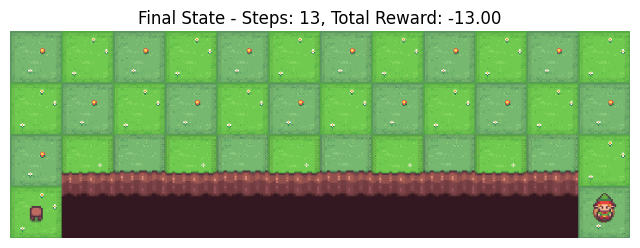

In [ ]:
visualize_agent(env, agent_ql)

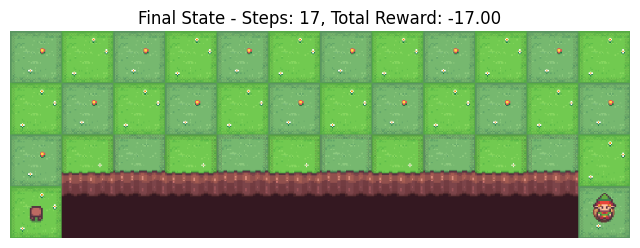

In [ ]:
visualize_agent(env, agent_evsarsa)

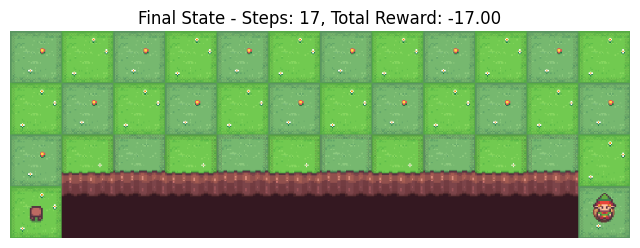

In [ ]:
visualize_agent(env, agent_sarsa)

### Idea!

- Давайте проверим, как будет меняться характер обучения в зависимости от разных значений $\epsilon$